## ナイーブベイズクラス分類器

* 線形モデルよりもさらに高速
* しかし汎化性能はLogisticRegressionやLinearSVCよりも劣る

#### なぜ高速なのか
* クラスに対する統計量をここの特徴量ごとに集めて、パラメータを学習するから

#### scikit-learnのナイーブベイズクラスの種類
* GaussianNB(任意の連続値データに適用できる)
* BernoulliNB(2値データを仮定している)
* MultinomialNB(カウントデータを（文中の単語の出現数）を仮定している)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [2]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])

y = np.array([0,1,0,1])

In [3]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


* MultinomialNBではクラスごとの、個々の特徴量の平均値を考慮する
* GaussianNBでは平均値だけではなくて標準偏差も格納する
* MultinomialNb,BernoulliNBでは線形モデルと同じ形の式になる

### 利点・欠点・パラメータ
* MultinomialNb,BernoulliNBにはパラメータは一つある。（alpha）
* alphaが大きくなるとスムーズになり、モデルの複雑さは減少する。
* GaussianNBは高次元データに対して用いられる。
* MultinomialNb > BernoulliNB.多数の非ゼロ特徴量がある場合はMultinomialNBが有効

* 利点と欠点の多くは線形モデルと共通する
* 線形モデルで時間がかかる場合でも、ナイーブベイズモデルは非常に有効

## 決定木
* クラス分類と回帰タスクに広く用いられている。

#### 用語
* test:yes/no型の質問学習
* root:頂点ノード、つまりデータセット全体
* pure:一つの対象値のデータポイントしか含まないような決定木の葉のこと

### 決定木の複雑さの制御
##### 葉が純粋になるまで分割を続けるとモデルは複雑になり、訓練データに対して過剰適合になってしまう

#### ・過剰適合を防ぐための方法

* 事前枝刈り：構築過程で木の生成を早めに止める方法（事前に最大の深さを設定するなど）
* 事後枝刈り：一度気を構築してから情報の少ないノードを削除する方法

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on training set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on training set:0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on training set:{:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set:0.988
Accuracy on training set:0.951


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignat", "benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

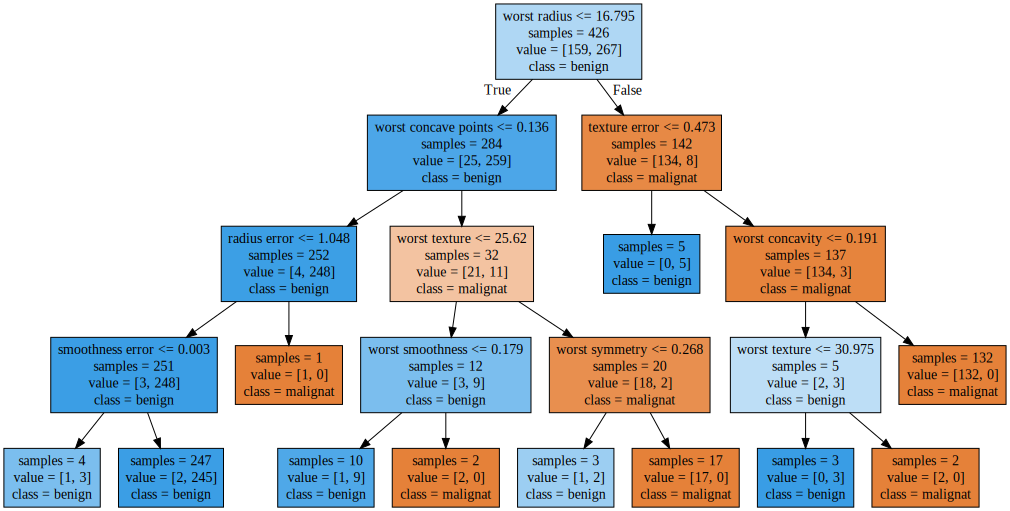

In [7]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


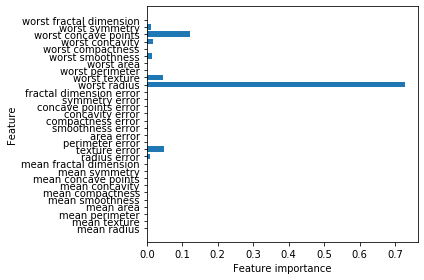

In [9]:
def plot_feature_importances_caner(model):
    n_feature = cancer.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    
plot_feature_importances_caner(tree)

Feature importances: [0. 1.]


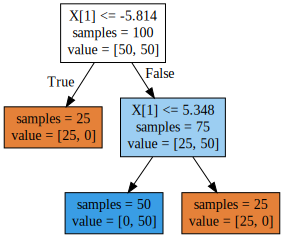

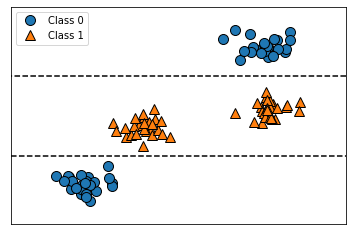

In [10]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [11]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

Text(0, 0.5, 'Price in $/Mbyte')

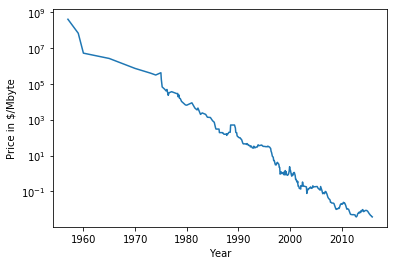

In [12]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

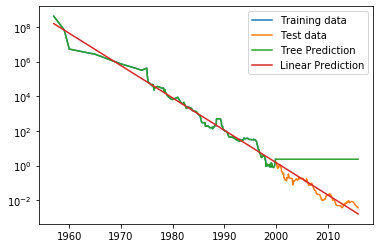

In [14]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Prediction")
plt.legend()

#### パラメータ
* 決定木におけるモデルの複雑さを制御するパラメータは、決定木が完全に成長する前に構築を停止する事前刈りパラメータ
* 過剰適合を防ぐために、max_depth, max_leaf_nodes, min_samples_leafのどれかを選択する

#### 利点
* 結果のモデルが容易に可視化可能
* データのスケールに対して完全に不変であること。（特徴量や正規化、標準化を必要としない。また二値特徴量と連続値特徴量が混ざっている）

#### 問題点
* 過剰適合しやすく、汎化性能が低い。なので決定木単体ではなくて、アンサンブル法が多く用いられる。

### 決定木のアンサンブル法
* 複数の機械学習モデルを組み合わせることで、より強力なモデルを作成することができる。

##### 種類
* ランダムフォレスト
* 勾配ブースティング決定木

#### ランダムフォレスト
* ランダムフォレストとは異なる決定木をたくさん集めたもの。
* それぞれ異なった方向に過剰適合した決定木をたくさん作れば、その結果の平均をとることで過剰適合の度合いを減らすことができる。
##### 乱数調節
* 決定木を作るためのデータポイントを用いる方法
* 分岐テストに用いる特徴を選択する方法

#### ランダムフォレストの構築
* 構築する決定木の数の決定（RandomForestRegressor, RandomForestClassifierのn_estimatorsパラメータ）


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [17]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [18]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

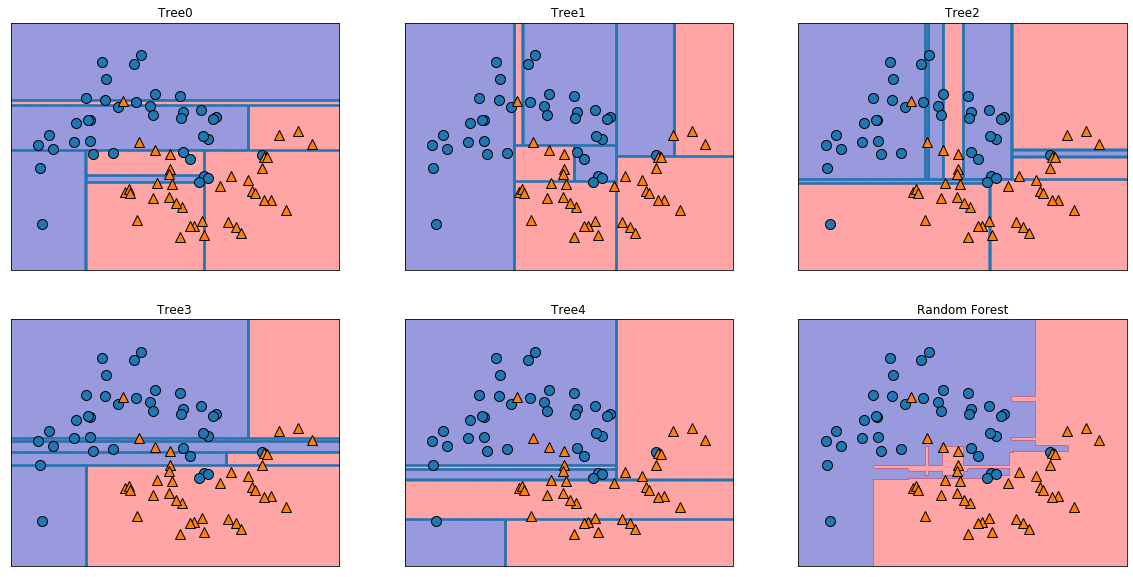

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

#### 決定木
* 5つの決定木が学習した決定境界は相互に異なる
* ブートストラップサンプリングの結果、訓練データの一部が、それぞれの決定木が学習した際の訓練データセットに含まれなかった

#### ランダムフォレスト
* どの決定木より過剰適合が少ない。直感に合致した決定境界を描いている。
* 多くの決定木を用いることで決定境界はより滑らかになる

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.972


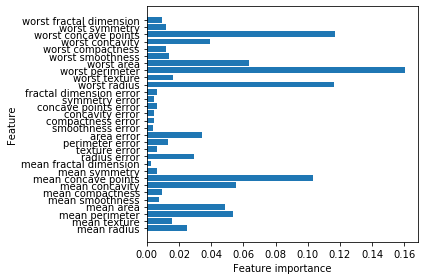

In [25]:
plot_feature_importances_caner(forest)
plt.tight_layout()

#### 非常に強力なランダムフォレスト
* 決定木を使うとしたら簡潔な表現が欲しい時
* ランダムフォレストは本質的にランダムで、乱数シードを設定しないと、構築されるモデルが大きく変わる
* 非常に大きなデータに対しても機能する
* 強力な計算機では複数のCPUを用いて簡単に並列化できる

#### 問題点
* テキストデータなどの高次元データで疎なデータにはうまく機能しない。→線形モデルの方が適している。
* 多くのメモリを消費すし、訓練も予測も遅い。→実行時間やメモリが非常に重要な場合は、線形モデルを使うべき

#### パラメータ
* 調整すべき重要なパラメータは、n_estimators, max_features, max_depthなどの事前枝刈りパラメータ
* n_estimatorsは大きければ大きい程良い（過剰適合が低減・アンサンブルが頑健）
* max_featureはここの決定木の乱数性を決定、これが小さくなると過剰適合が小さくなる。一般にはデフォルト値
* クラス分類はmax_featurs=sqrt(n_features),回帰はmax_features=n_featuresとなっている。
* max_featrueやmax_leaf_nodesを追加すると性能が上がることもある。

### 勾配ブースティング回帰木
* 複数の決定木を組み合わせてより強力なモデルを構築するもう一つのアンサンブル法
* 一つ前の決定木の誤りを次の決定技が修正するようにして、決定木を作成していく（乱数性はない）。→強力な事前刈りが用いられる。
* 深さ1〜５からの非常に浅い決定技が用いられる。（モデルのメモリが小さくなり、予測も高速になる）**弱学習機**
* 学習率というパラメータが使用される

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.965


In [27]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.972


In [28]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.965


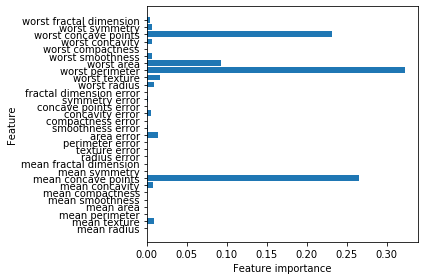

In [30]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_caner(gbrt)
plt.tight_layout()

#### 気を付ける点
* パラメータのチューニングに細心の注意を払う必要がある。
* 訓練に時間がかかる
* やはり高次元の疎なデータには適さない

#### 重要なパラメータ
* 決定木の数を指定するn_estimators,learnin_rateを小さくすること。
* 勾配ブースティングの場合はn_estimatorを大きくしすぎると複雑なモデルを許容することになり過剰学習を招く
* max_depth（深さが５以上になることはない）